In [15]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#export
from fastml.core import *
from fastml.data import *
from fastml.examples import examples
from fastml.model.model import *
from fastml.model.image.cnn import *

In [20]:
mnist_data = examples.get_mnist_data_bunch()

## Hooks

In [23]:
#export
class Hook():
    def __init__(self, layer, hook_func): self.hook = layer.register_forward_hook(partial(hook_func, self))
    def remove(self): self.hook.remove()
    def __del__(self): self.remove()

In [33]:
#export
def append_stats(hook, model, inp, outp):
    if not hasattr(hook,'stats'): hook.stats = ([],[])
    means,stds = hook.stats
    means.append(outp.data.mean())
    stds.append(outp.data.std())

def children(m): return list(m.children())

In [28]:
runner, learner = examples.get_mnist_cnn(mnist_data)

In [30]:
hooks = [Hook(l, append_stats) for l in children(learner.model[:4])]

In [46]:
runner.fit(1, learner)

train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]
train: [0.0733378125, 97.682]
valid: [0.06857821044921875, 98.06]


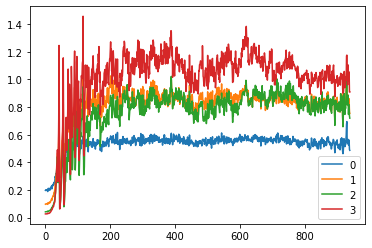

In [32]:
for hook in hooks:
    plt.plot(hook.stats[0])
    hook.remove()
plt.legend(range(4));

In [42]:
#export
class Hooks(ListContainer):
    def __init__(self, layers, hook_func): super().__init__([Hook(layer, hook_func) for layer in layers])
    def __enter__(self, *args): return self
    def __exit__ (self, *args): self.remove()
    def __del__(self): self.remove()

    def __delitem__(self, i):
        self[i].remove()
        super().__delitem__(i)
        
    def remove(self):
        for h in self: h.remove()

In [43]:
runner, learner = examples.get_mnist_cnn(mnist_data)
hooks = Hooks(learner.model, append_stats)
hooks

Hooks (7 items)
[<__main__.Hook object at 0x127b9fe48>, <__main__.Hook object at 0x1155980f0>, <__main__.Hook object at 0x127b86e10>, <__main__.Hook object at 0x127b86f98>, <__main__.Hook object at 0x127b86828>, <__main__.Hook object at 0x127b86048>, <__main__.Hook object at 0x127b86d30>]

train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.4894855078125, 83.62]
valid: [0.1215216796875, 96.42]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]
train: [0.10135447265625, 96.816]
valid: [0.10272777099609375, 97.05]


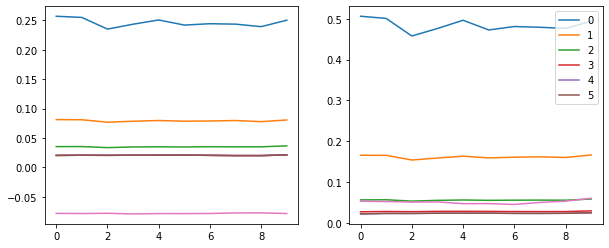

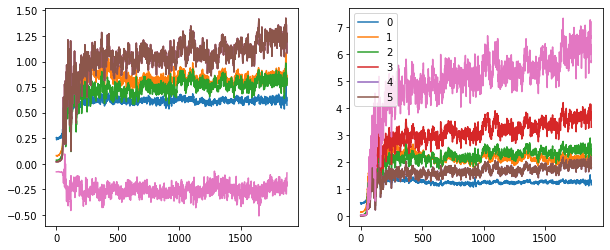

In [45]:
with Hooks(learner.model, append_stats) as hooks:
    runner.fit(2, learner)
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks:
        ms,ss = h.stats
        ax0.plot(ms[:10])
        ax1.plot(ss[:10])
    plt.legend(range(6));
    
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks:
        ms,ss = h.stats
        ax0.plot(ms)
        ax1.plot(ss)
    plt.legend(range(6));

## Export

In [3]:
!python notebook2script.py stats_dev.ipynb fastml/model/stats.py

Converted stats_dev.ipynb to fastml/model/stats.py
